*Работу выполнил: студент МАИ группы М8О-407Б-18 Ильминский Никита.*

*Работу проверил: преподаватель МАИ Ахмед Самир Халид.*

# Лабораторная работа №1 по Машинному Обучению.

In [1]:
import numpy as np
import pandas as pnds
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes

## Постановка задачи

**Необходимо**:

- найти себе набор данных (датасет) и проанализировать его. Выявить проблемы набора данных, устранить их. Визуализировать зависимости, показать распределения некоторых признаков.
- реализовать алгоритмы К ближайших соседей и Наивный Байесовский классификатор, сравнить с реализацией библиотеки *sklearn*.


Найденный мною датасет представляет собой список игроков Национальной Баскетбольной Ассоциации, их статистические показатели за первый сезон в лиге (количество игр, минут, очков, реализованных бросков в среднем за игру и т.д.) и поле 'TARGET_5Yrs', значение которого равно '1.0', если игрок провел в лиге более или ровно 5 сезонов, и '0.0' в противном случае.

In [2]:
dataset = pnds.read_csv('nba_logreg.csv')
dataset.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**Задача: исходя из статистических показателей игрока в его первый сезон в лиге, определить, сможет ли этот игрок провести более или ровно 5 сезонов за свою профессиональную карьеру.**

## Проведем анализ данных, выявим проблемы и попытаемся их устранить:

- Последний раз датасет был обновлен 4 года назад, и за это время для некоторых игроков опыт выступления в лиге смог превысить отметку в 5 лет, и, соответственно, значение 'TARGET_5Yrs' для этих игроков может быть изменено с '0' на '1'. Для данного датасета исправить это автоматически не удастся, так как для игроков не указан год драфта (вступления в лигу), а делать это руками слишком времязатратно, поэтому оставим эти данные, как есть.

- Проверим отсутствие данных:

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

Как видно из информации о датасете, количество непустых значений в столбце 3P% (1329) меньше, чем общее количество игроков (1340). Скорее всего, это связано с тем, что в наборе данных есть игроки, задрафтованные ранее 1979 года - года, когда в NBA впервые была введена трехочковая линия. Найдем этих баскетболистов:

In [5]:
dataset[dataset['3P%'].isnull()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


Решение - не рассматривать игроков с пустым значением процента трехочковых (благо их в данном наборе немного), то есть удалить соответствующие строки:

In [6]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

- Для удобства преобразуем значения столбца TARGET_5Yrs из float64 в int:

In [7]:
dataset['TARGET_5Yrs'] = dataset['TARGET_5Yrs'].apply(lambda x: int(x))
dataset['TARGET_5Yrs']

0       0
1       0
2       0
3       1
4       1
       ..
1335    0
1336    1
1337    0
1338    1
1339    1
Name: TARGET_5Yrs, Length: 1329, dtype: int64

- Выбросим ненужный признак - столбец с именами игроков (для классификации он не нужен):

In [8]:
dataset = dataset.drop(columns=['Name'])

- Отделим друг от друга признаки (features) и метки класса (labels), а также разделим наши данные на обучающую и тестовую выборку:

In [9]:
features, labels = dataset.drop(columns=['TARGET_5Yrs']).to_numpy(), np.array(dataset['TARGET_5Yrs'])

trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size=0.2, random_state=1234)

## Визуализируем зависимости, построим графики распределения статистических показателей:

- Посмотрим на зависимости между статистическими показателями:

In [10]:
correlation = dataset.corr()
correlation

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693,0.397783
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431,0.316031
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272,0.314632
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343,0.316393
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952,0.290684
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429,0.235587
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015,0.035025
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496,0.016151
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277,-0.003411
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762,0.295546


<AxesSubplot:>

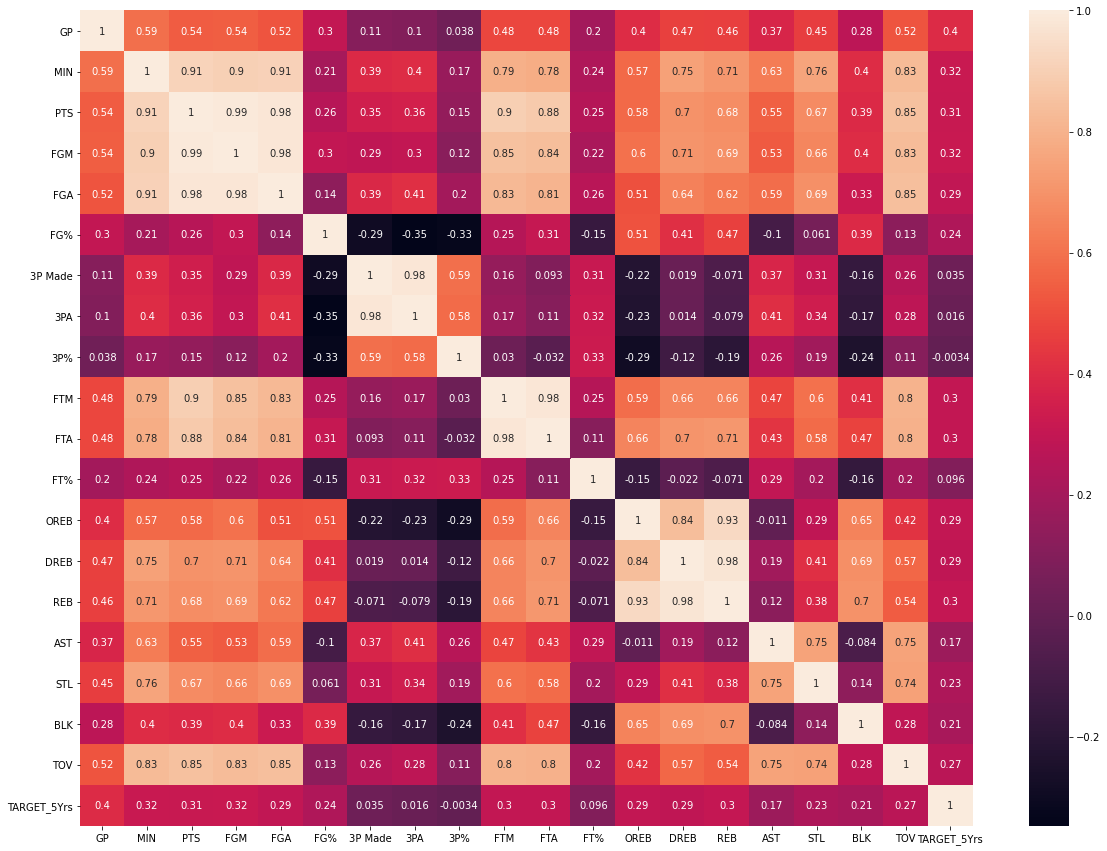

In [11]:
plt.subplots(figsize=(20,15))
sb.heatmap(correlation, annot=True)

Можем наблюдать очевидные закономерности: например, сильно коррелируют показатели среднего количества очков за игру (PTS) и среднего количества выполненных в игре бросков (FGA). Действительно, чем больше раз бросишь, тем больше раз попадешь...

In [12]:
correlation['PTS'].sort_values(ascending=False)

PTS            1.000000
FGM            0.990874
FGA            0.979676
MIN            0.911746
FTM            0.896245
FTA            0.880826
TOV            0.850272
DREB           0.696560
REB            0.679002
STL            0.674937
OREB           0.576421
AST            0.551561
GP             0.539069
BLK            0.390496
3PA            0.355198
3P Made        0.345289
TARGET_5Yrs    0.314632
FG%            0.261587
FT%            0.254404
3P%            0.151072
Name: PTS, dtype: float64

- Построим графики распределения:

array([[<AxesSubplot:title={'center':'GP'}>,
        <AxesSubplot:title={'center':'MIN'}>,
        <AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'FGM'}>],
       [<AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'3P Made'}>,
        <AxesSubplot:title={'center':'3PA'}>],
       [<AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'FTM'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>,
        <AxesSubplot:title={'center':'REB'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TOV'}>,
        <AxesSubplot:title={'center':'TARGET_5Yrs'}>]], dtype=object)

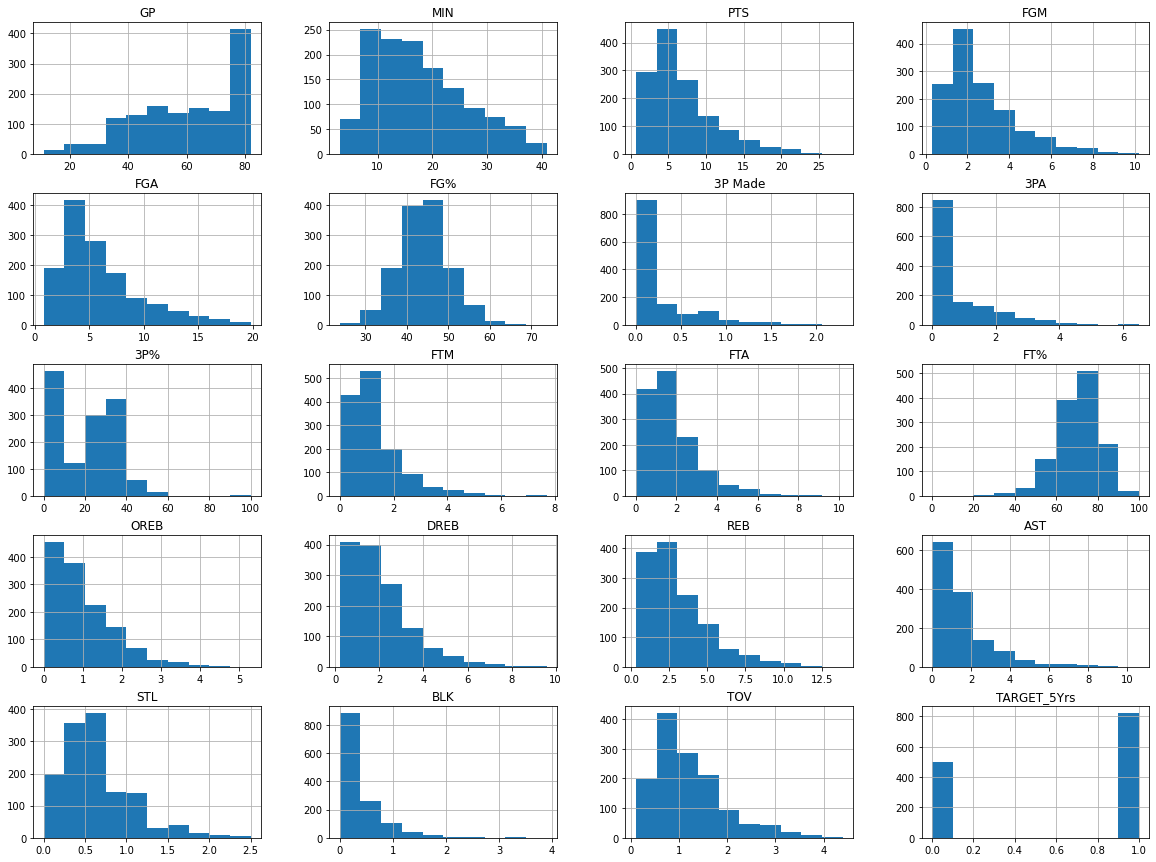

In [13]:
dataset[dataset.columns].hist(figsize=(20,15))

## Реализуем алгоритм K ближайших соседей (KNN, KNearestNeighbours):

In [14]:
#в качестве расстояния между объектами (векторами) берем евклидову норму их разности
def distance(object1, object2):
    return np.sqrt(np.sum((object1 - object2) ** 2))

def KNN(testFeatures, k):
    testSize = testFeatures.shape[0]
    classification = np.zeros(testSize)
    
    trainSize = trainFeatures.shape[0]
    for testIdx in range(testSize):
        testObject = testFeatures[testIdx]

        class_distance_vector = np.zeros((trainSize, 2), dtype=int)
        for trainObjectIdx in range(trainSize):
            trainObject = trainFeatures[trainObjectIdx]
            class_distance_vector[trainObjectIdx][0] = trainLabels[trainObjectIdx]
            class_distance_vector[trainObjectIdx][1] = distance(testObject, trainObject)

        kNearestNeighbours = sorted(class_distance_vector, key=lambda kv: kv[1])[:k]
        
        classCounter = [0, 0]
        for i in range(k):
            classCounter[kNearestNeighbours[i][0]] += 1
        if classCounter[0] > classCounter[1]:
            classification[testIdx] = 0
        else:
            classification[testIdx] = 1
    
    return classification

Используем метрики для оценки качества классификатора:

In [15]:
def getMetrics(trueLabels, predictions):
    classZero_true, classOne_true, classZero_false, classOne_false,  = 0, 0, 0, 0
    
    for i in range(trueLabels.shape[0]):
        if trueLabels[i] == 0 and predictions[i] == 0: classZero_true += 1
        if trueLabels[i] == 1 and predictions[i] == 0: classZero_false += 1
        if trueLabels[i] == 1 and predictions[i] == 1: classOne_true += 1
        if trueLabels[i] == 0 and predictions[i] == 1: classOne_false += 1
        
    print('Accuracy:', (classOne_true + classZero_true) / (classOne_true + classZero_true + classOne_false + classZero_false))
    print('Precision:', classOne_true / (classOne_true + classOne_false))
    print('Recall:', classOne_true / (classOne_true + classZero_false))

В нашем случае - случае двухклассовой классификации, будет полезным взять нечетное значение K для избежания ситуаций, когда количество ближайших соседей одного и второго класса одинаково. Также число K не должно быть слишком большим, чтобы при определении класса более важную роль играла близость к объектам, а не их количество.

In [16]:
k = 21
predictions = KNN(testFeatures, k)
getMetrics(testLabels, predictions)

Accuracy: 0.7142857142857143
Precision: 0.7526881720430108
Recall: 0.8235294117647058


Сравним нашу реализацию с тем же алгоритмом из библиотеки *sklearn*:

In [17]:
sklearnKNN = KNeighborsClassifier(k, metric='euclidean')
sklearnKNN.fit(trainFeatures, trainLabels)
predictions = sklearnKNN.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.706766917293233
Precision: 0.7473118279569892
Recall: 0.8176470588235294


## Реализуем Наивный Байесовский классификатор (NB, NaiveBayes):

In [18]:
class NaiveBayes():
    def gaussianParameters(X):
        meanValues = np.mean(X, axis=0)
        standartDeviations = np.std(X, axis=0)
        return list(zip(meanValues, standartDeviations))

    def gaussianProbability(x, meanValue, stdDeviation):
        return (1 / np.sqrt(2 * np.pi * np.square(stdDeviation))) * np.exp(-np.square(x - meanValue) / (2 * np.square(stdDeviation)))

    def fit(self, trainFeatures, trainLabels):
        classObjects = {}
        for trainObject, trainClass in zip(trainFeatures, trainLabels):
            if trainClass not in classObjects:
                classObjects[trainClass] = list()
            classObjects[trainClass].append(trainObject)
        
        self.classLabels = np.unique(trainLabels)
        self.distributionParameters = {classLabel: NaiveBayes.gaussianParameters(classObject) for classLabel, classObject in classObjects.items()}
        self.classProbability = {classLabel: len(classObject) / len(trainFeatures) for classLabel, classObject in classObjects.items()}

    def predict(self, testFeatures):
        classification = []
        
        for testObject in testFeatures:
            resultProbabilities = {}
            for classLabel in self.classLabels:
                likelihood = 1
                for i, (meanValue, stdDeviation) in enumerate(self.distributionParameters[classLabel]):
                    likelihood *= NaiveBayes.gaussianProbability(testObject[i], meanValue, stdDeviation)
                
                resultProbabilities[classLabel] = self.classProbability[classLabel] * likelihood
            
            classification.append(max(resultProbabilities.items(), key=lambda kv: kv[1])[0])
        
        return classification

In [19]:
NB = NaiveBayes()
NB.fit(trainFeatures, trainLabels)
predictions = NB.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.6353383458646616
Precision: 0.8288288288288288
Recall: 0.5411764705882353


Сравним нашу реализацию с тем же алгоритмом из библиотеки *sklearn*:

In [20]:
sklearnNB = naive_bayes.GaussianNB()
sklearnNB.fit(trainFeatures, trainLabels)
predictions = sklearnNB.predict(testFeatures)
getMetrics(testLabels, predictions)

Accuracy: 0.6353383458646616
Precision: 0.8288288288288288
Recall: 0.5411764705882353


# Выводы:

Точности реализованных классификаторов и их вариантов из библиотеки *sklearn* практически совпадают, что хорошо, однако полученные значения метрик говорят о том, что для решения задачи классификации данного датасета, возможно, нужно использовать другие алгоритмы.

Несмотря на это, очень полезным мне показался полученный опыт работы с самим датасетом при помощи инструментов *Pandas*, что мотивирует использовать эту библиотеку в дальнейшем.